In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from Analysis.model.helper import read_data
from Analysis.model.helper import write_data

Data Loading

In [ ]:
data = read_data("data.csv")

data.sort_values(by="Rows", ascending=True, inplace=True)
data.head()

,Name,Rows,Columns,Error,Memory,Time,Language,OS,Nnz,Cond
13,ex15,6867,6867,6.348200e-07,3.616800,0.030822,0,0,98671,1.432642e+13
15,ex15,6867,6867,6.348200e-07,0.000000,0.024699,0,1,98671,1.432642e+13
14,ex15,6867,6867,5.281170e-05,2.664623,0.022156,1,1,98671,1.432642e+13
12,ex15,6867,6867,5.281170e-05,0.003326,0.015078,1,0,98671,1.432642e+13
4,cfd1,70656,70656,6.628463e-12,0.003326,4.461982,1,0,1825580,1.335081e+06


# MATLAB

In [ ]:
# Filters rows by OS
data_mat = data[data.Language == 0]
data_mat.head()

data_mat_win = data_mat[data_mat.OS == 0]
data_mat_lin = data_mat[data_mat.OS == 1]

## Error

In MATLAB gli errori Relativi tra i due Sistemi Operativi sono identici, quindi le due linee si sovrappongono per tutte le matrici

[6.3482e-07, 1.1359e-13, 2.6728e-16, 3.3486e-13, 1.05e-12, 4.3889e-11, 3.5766e-12]
[6.3482e-07, 1.1359e-13, 2.6728e-16, 3.3486e-13, 1.05e-12, 4.3889e-11, 3.5766e-12]


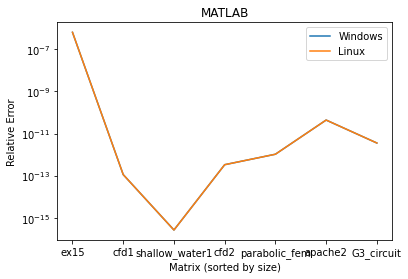

In [ ]:
mat_win_errors = data_mat_win.Error.tolist()
mat_lin_errors = data_mat_lin.Error.tolist()
print(mat_win_errors)
print(mat_lin_errors)

matrix_names = data_mat_win.Name.tolist()

plt.plot(matrix_names,mat_win_errors, label="Windows")
plt.plot(matrix_names,mat_lin_errors, label="Linux")
plt.title('MATLAB Error')
plt.xlabel('Matrix (sorted by size)')
plt.ylabel('Relative Error')
plt.yscale('log')
plt.legend()
plt.show()

## Memory

Utilizzo di memoria sempre molto simile, ma Linux leggermente meglio in tutte, con differenza leggermente marcata in *parabolic_fem, apache2 e G3_circuit*

C'è comunque da considerare che tra Windows e Linux sono state usate due funzioni differenzi per il tracking della memoria, e non si sa con certezza se questo ha potuto impattare la misurazione

[3.6168, 577.5852, 41.5662, 1187.7089, 607.6006, 2877.0181, 3262.5295]
[0.0, 560.592, 0.0, 1145.468, 538.452, 2769.992, 3203.66]


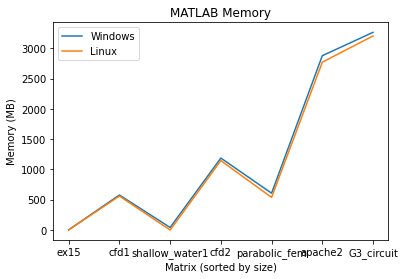

In [ ]:
mat_win_mem = data_mat_win.Memory.tolist()
mat_lin_mem = data_mat_lin.Memory.tolist()
print(mat_win_mem)
print(mat_lin_mem)

matrix_names = data_mat_win.Name.tolist()

plt.plot(matrix_names,mat_win_mem, label="Windows")
plt.plot(matrix_names,mat_lin_mem, label="Linux")
plt.title('MATLAB Memory')
plt.xlabel('Matrix (sorted by size)')
plt.ylabel('Memory (MB)')
plt.legend()
plt.show()

## Time

Anche il tempo è molto simile, in generale vince Windows 5-2, Ma a parte per *apache2*, in cui Windows è *1.5s* più veloce, è sempre una differenza in decimi di secondi 

[0.030822, 2.5576, 0.25437, 6.0834, 3.0333, 13.4307, 19.5037]
[0.024699, 2.7237, 0.26305, 6.2418, 3.2869, 15.1453, 18.8832]


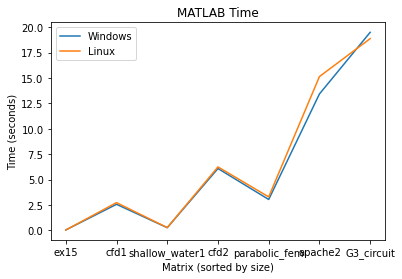

In [ ]:
mat_win_time = data_mat_win.Time.tolist()
mat_lin_time = data_mat_lin.Time.tolist()
print(mat_win_time)
print(mat_lin_time)

matrix_names = data_mat_win.Name.tolist()

plt.plot(matrix_names,mat_win_time, label="Windows")
plt.plot(matrix_names,mat_lin_time, label="Linux")
plt.title('MATLAB Time')
plt.xlabel('Matrix (sorted by size)')
plt.ylabel('Time (seconds)')
plt.legend()
plt.show()

# Python

In [ ]:
# Filters rows by OS
data_py = data[data.Language == 1]
data_py.head()

data_py_win = data_py[data_py.OS == 0]
data_py_lin = data_py[data_py.OS == 1]

## Error

Anche in Python gli errori Relativi tra i due Sistemi Operativi sono identici, quindi le due linee si sovrappongono per tutte le matrici

[5.28117015891863e-05, 6.62846322021346e-12, 6.92399203206692e-14, 1.33416072036247e-10, 8.83677937470142e-10, 2.23594130910856e-08, 3.45256793174384e-09]
[5.28117015891863e-05, 6.62846322021346e-12, 6.92399203206692e-14, 1.33416072036247e-10, 8.83677937470142e-10, 2.23594130910856e-08, 3.45256793174384e-09]


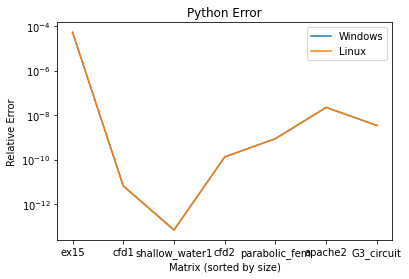

In [ ]:
py_win_errors = data_py_win.Error.tolist()
py_lin_errors = data_py_lin.Error.tolist()
print(py_win_errors)
print(py_lin_errors)

matrix_names = data_py_win.Name.tolist()

plt.plot(matrix_names,py_win_errors, label="Windows")
plt.plot(matrix_names,py_lin_errors, label="Linux")
plt.title('Python Error')
plt.xlabel('Matrix (sorted by size)')
plt.ylabel('Relative Error')
plt.yscale('log')
plt.legend()
plt.show()

## Memory



[0.003326416015625, 0.003326416015625, 9.06751441955566, 0.003326416015625, 0.003326416015625, 0.004470825195313, 210.620558738708]
[2.66462326049805, 49.466570854187, 0.003326416015625, 0.003326416015625, 0.003326416015625, 131.386811256409, 0.003326416015625]


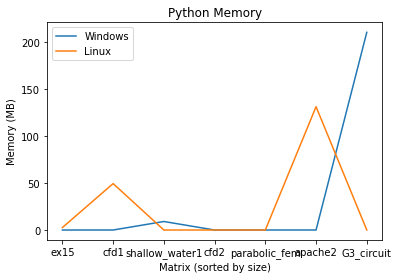

In [ ]:
py_win_mem = data_py_win.Memory.tolist()
py_lin_mem = data_py_lin.Memory.tolist()
print(py_win_mem)
print(py_lin_mem)

matrix_names = data_py_win.Name.tolist()

plt.plot(matrix_names,py_win_mem, label="Windows")
plt.plot(matrix_names,py_lin_mem, label="Linux")
plt.title('Python Memory')
plt.xlabel('Matrix (sorted by size)')
plt.ylabel('Memory (MB)')
plt.legend()
plt.show()

## Time

In Python il vantaggio di Windows è più marcato, che è più veloce di Linux per tutte le matrici, soprattutto *apache2*, con *17s* di differenza, e *G3_circuit*, con *6s*

[0.015077590942383, 4.46198153495789, 0.615064144134522, 10.9170985221863, 6.43960165977478, 66.2321915626526, 27.9392647743225]
[0.022155523300171, 5.38265681266785, 0.745701313018799, 13.4831767082214, 7.92075800895691, 83.3728008270264, 33.8106868267059]


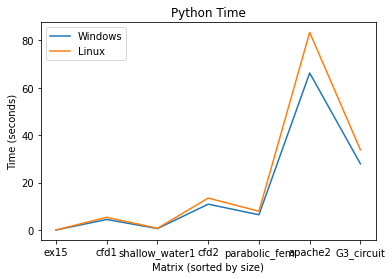

In [ ]:
py_win_time = data_py_win.Time.tolist()
py_lin_time = data_py_lin.Time.tolist()
print(py_win_time)
print(py_lin_time)

matrix_names = data_py_win.Name.tolist()

plt.plot(matrix_names,py_win_time, label="Windows")
plt.plot(matrix_names,py_lin_time, label="Linux")
plt.title('Python Time')
plt.xlabel('Matrix (sorted by size)')
plt.ylabel('Time (seconds)')
plt.legend()
plt.show()